In [58]:
using Plots
import Pkg; Pkg.add("DataFrames")
using DataFrames
using Statistics
using Plots
import Pkg; Pkg.add("PlotlyJS")
using Pkg
Pkg.add("IJulia")
import Pkg; Pkg.add("PyPlot")


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [59]:
function calc_velocity(angle::Float64, L_dis::Float64, vel::Float64)
    c::Float64 = 1480.00
    td = L_dis / (c + vel * cosd(angle))
    tu = L_dis / (c - vel * cosd(angle))
    delta_time = tu - td
    v::Float64 = (L_dis * delta_time) / (2 * cosd(angle) * tu * td)
    return v
end

calc_velocity (generic function with 1 method)

In [60]:
function add_noise(value::Float64, noise_level::Float64)
    return value + (randn()*2-1) * noise_level
end

add_noise (generic function with 1 method)

In [61]:
function calc_MAE(v::Vector{Float64}, v_hat::Vector{Float64})
    return mean(abs.(v .- v_hat))
end

calc_MAE (generic function with 1 method)

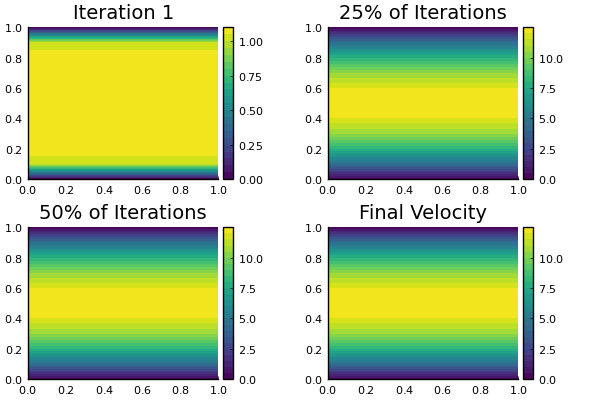

sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [62]:
using LinearAlgebra
using Plots
pyplot()

N_POINTS = 11
KINEMATIC_VISCOSITY = 0.01
TIME_STEP_LENGTH = 0.1
N_TIME_STEPS = 5000
PRESSURE_GRADIENT = [-1.0, 0.0]

element_length = 1.0 / (N_POINTS - 1)
x_range = range(0.0, stop=1.0, length=N_POINTS)
y_range = range(0.0, stop=1.0, length=N_POINTS)

coordinates_x = [x for x in x_range, y in y_range]
coordinates_y = [y for x in x_range, y in y_range]

function central_difference_x_periodic(field, element_length)
    diff = (circshift(field, (0, 1)) - circshift(field, (0, -1))) / (2 * element_length)
    return diff
end

function laplace_periodic(field, element_length)
    diff = (circshift(field, (0, 1)) + circshift(field, (1, 0)) +
            circshift(field, (0, -1)) + circshift(field, (-1, 0)) -
            4 * field) / element_length^2
    return diff
end

velocity_x_prev = ones(N_POINTS, N_POINTS)
velocity_x_prev[1, :] .= 0.0
velocity_x_prev[end, :] .= 0.0

velocity_x_instant_1 = copy(velocity_x_prev)
velocity_x_instant_2 = copy(velocity_x_prev)
velocity_x_instant_3 = copy(velocity_x_prev)
velocity_x_final = copy(velocity_x_prev)

for iter in 1:N_TIME_STEPS
    convection_x = velocity_x_prev .* central_difference_x_periodic(velocity_x_prev, element_length)
    diffusion_x = KINEMATIC_VISCOSITY * laplace_periodic(velocity_x_prev, element_length)

    velocity_x_next = velocity_x_prev .+ TIME_STEP_LENGTH * (-PRESSURE_GRADIENT[1] .+ diffusion_x .- convection_x)

    velocity_x_next[1, :] .= 0.0
    velocity_x_next[end, :] .= 0.0

    if iter == 1
        velocity_x_instant_1 .= velocity_x_next
    elseif iter == Int(N_TIME_STEPS * 0.25)
        velocity_x_instant_2 .= velocity_x_next
    elseif iter == Int(N_TIME_STEPS * 0.5)
        velocity_x_instant_3 .= velocity_x_next
    elseif iter == N_TIME_STEPS
        velocity_x_final .= velocity_x_next
    end

    velocity_x_prev = velocity_x_next
end

p1 = contourf(coordinates_y, coordinates_x, velocity_x_instant_1, levels=25, title="Iteration 1", color=:viridis)
p2 = contourf(coordinates_y, coordinates_x, velocity_x_instant_2, levels=25, title="25% of Iterations", color=:viridis)
p3 = contourf(coordinates_y, coordinates_x, velocity_x_instant_3, levels=25, title="50% of Iterations", color=:viridis)
p4 = contourf(coordinates_y, coordinates_x, velocity_x_final, levels=25, title="Final Velocity", color=:viridis)

plot(p1, p2, p3, p4, layout=(2,2))


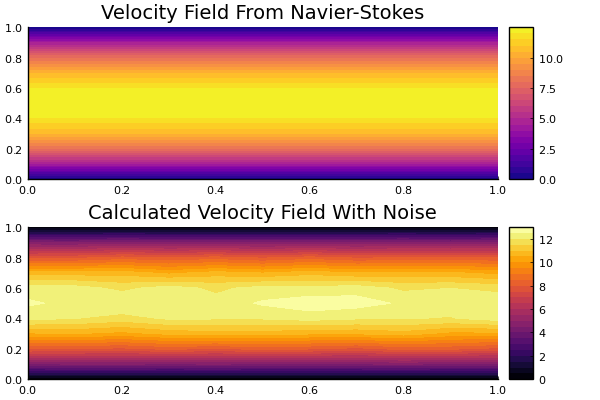

sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [63]:
using LinearAlgebra
using Plots
pyplot()

N_POINTS = 11
KINEMATIC_VISCOSITY = 0.01
TIME_STEP_LENGTH = 0.1
N_TIME_STEPS = 5000
PRESSURE_GRADIENT = [-1.0, 0.0]
SPEED_OF_SOUND = 1450  
L = 1.0  
alpha = pi / 4  
noise_level = 0.05  

element_length = 1.0 / (N_POINTS - 1)
x_range = range(0.0, stop=1.0, length=N_POINTS)
y_range = range(0.0, stop=1.0, length=N_POINTS)

coordinates_x = [x for x in x_range, y in y_range]
coordinates_y = [y for x in x_range, y in y_range]

function central_difference_x_periodic(field, element_length)
    diff = (circshift(field, (0, 1)) - circshift(field, (0, -1))) / (2 * element_length)
    return diff
end

function laplace_periodic(field, element_length)
    diff = (circshift(field, (0, 1)) + circshift(field, (1, 0)) +
            circshift(field, (0, -1)) + circshift(field, (-1, 0)) -
            4 * field) / element_length^2
    return diff
end

function calculate_time_difference_and_velocity(v, c, L, alpha, noise_level)
    t_d = L / (c + v * cos(alpha))  
    t_u = L / (c - v * cos(alpha))  
    
    delta_t = t_u - t_d
    
    product_t = t_u * t_d
    
    v_calculated = (L * delta_t) / (2 * cos(alpha) * product_t)
    
    v_measured = v_calculated * (1.0 + noise_level * (rand() - 0.5))
    
    return delta_t, v_measured
end

velocity_x_prev = ones(N_POINTS, N_POINTS)
velocity_x_prev[1, :] .= 0.0
velocity_x_prev[end, :] .= 0.0

velocity_x_instant_1 = copy(velocity_x_prev)
velocity_x_instant_2 = copy(velocity_x_prev)
velocity_x_instant_3 = copy(velocity_x_prev)
velocity_x_final = copy(velocity_x_prev)

calculated_velocity_field = zeros(N_POINTS, N_POINTS)

# Main simulation loop
for iter in 1:N_TIME_STEPS
    convection_x = velocity_x_prev .* central_difference_x_periodic(velocity_x_prev, element_length)
    diffusion_x = KINEMATIC_VISCOSITY * laplace_periodic(velocity_x_prev, element_length)

    velocity_x_next = velocity_x_prev .+ TIME_STEP_LENGTH * (-PRESSURE_GRADIENT[1] .+ diffusion_x .- convection_x)

    velocity_x_next[1, :] .= 0.0  
    velocity_x_next[end, :] .= 0.0 

   
    if iter == 1
        velocity_x_instant_1 .= velocity_x_next
    elseif iter == Int(N_TIME_STEPS * 0.25)
        velocity_x_instant_2 .= velocity_x_next
    elseif iter == Int(N_TIME_STEPS * 0.5)
        velocity_x_instant_3 .= velocity_x_next
    elseif iter == N_TIME_STEPS
        velocity_x_final .= velocity_x_next

        for i in 1:N_POINTS
            for j in 1:N_POINTS
                v_local = velocity_x_final[i, j]
                delta_t, v_measured = calculate_time_difference_and_velocity(v_local, SPEED_OF_SOUND, L, alpha, noise_level)
                calculated_velocity_field[i, j] = v_measured
            end
        end
    end

    velocity_x_prev = velocity_x_next
end

# Create the plots without displaying them yet
p5 = contourf(coordinates_y, coordinates_x, velocity_x_final, levels=25, title="Velocity Field From Navier-Stokes", color=:plasma)
p6 = contourf(coordinates_y, coordinates_x, calculated_velocity_field, levels=25, title="Calculated Velocity Field With Noise", color=:inferno)

# Display all plots at once
plot(p5, p6, layout=(2,1))
